In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse, Circle

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
#city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
#ride_data.head()

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data,city_data,how="left",on=["city","city"])

# Display the data table for preview
del city_ride_data['date']
city_ride_data.head()
# city_ride_data.shape


,city,fare,ride_id,driver_count,type
0,Lake Jonathanshire,13.83,5739410935873,5,Urban
1,South Michelleport,30.24,2343912425577,72,Urban
2,Port Samanthamouth,33.44,2005065760003,57,Urban
3,Rodneyfort,23.44,5149245426178,34,Urban
4,South Jack,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

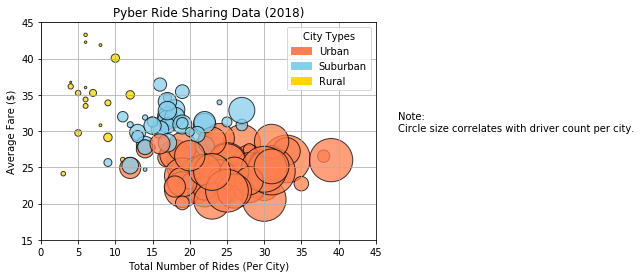

In [11]:
# Obtain the x and y coordinates for each of the three city types

x_axis = city_ride_data.groupby('city').ride_id.count()
y_axis = city_ride_data.groupby('city').fare.mean()

sizes = city_ride_data.groupby('city').driver_count.sum()

colortype = city_ride_data.groupby('city').type.first()

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l == 'Urban':
            cols.append('coral')
        elif l == 'Suburban':
            cols.append('skyblue')
        elif l == 'Rural':
            cols.append('gold')
        else:
            cols.append('red')
    return cols

colors = pltcolor(colortype)


# Build the scatter plots for each city types
plt.scatter(x_axis,y_axis,s=sizes,c=colors,alpha=0.75, edgecolors=['black']*len(colors), linewidths=[1]*len(colors),marker='o')

plt.grid(True)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlim(0,45)
plt.ylim(15,45)


# Create a legend
orange_legend = patches.Patch(color='coral', label='Urban')
blue_legend = patches.Patch(color='skyblue', label='Suburban')
yellow_legend = patches.Patch(color='gold', label='Rural')
plt.legend(handles=[orange_legend, blue_legend, yellow_legend],title="City Types")


# Incorporate a text label regarding circle size
t= ("Note:\n"
    "Circle size correlates with driver count per city."
   )
plt.text(48,30,t)

# Save Figure
plt.savefig('Pyber.png')

In [12]:
# Show plot
plt.show()

## Total Fares by City Type

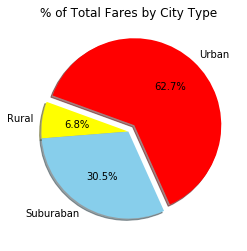

In [13]:
# Calculate Type Percents
c_totalfare = city_ride_data.fare.sum()
c_type = city_ride_data.groupby('type').fare.sum()
c_percent = c_type / c_totalfare * 100
c_percent

# Build Pie Chart
explode = (0, 0, 0.1)
colors=['yellow','skyblue','red']
labels=['Rural','Suburaban','Urban']
plt.title('% of Total Fares by City Type')
plt.pie(c_percent,startangle=160,explode=explode,colors=colors,shadow=True,autopct='%1.1f%%',labels=labels)

# Save Figure
plt.savefig('PieFarebyCity.png')

In [14]:
# Show Figure
plt.show()

## Total Rides by City Type

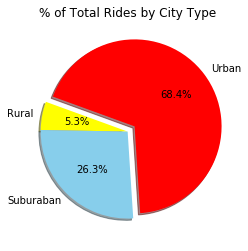

In [15]:
# Calculate Ride Percents
r_totalride = city_ride_data.ride_id.count()
r_type = city_ride_data.groupby('type').ride_id.count()
r_percent = r_type / r_totalride * 100
r_percent

# Build Pie Chart
explode = (0, 0, 0.1)
colors=['yellow','skyblue','red']
labels=['Rural','Suburaban','Urban']
plt.title('% of Total Rides by City Type')
plt.pie(r_percent,startangle=160,explode=explode,colors=colors,shadow=True,autopct='%1.1f%%',labels=labels)

# Save Figure
plt.savefig('PieRiderbyCity.png')

In [16]:
# Show Figure
plt.show()

## Total Drivers by City Type

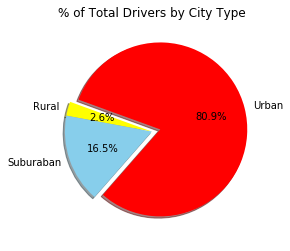

In [17]:
# Calculate Driver Percents
d_totaldriver = city_data.driver_count.sum()
d_totaldriver
d_type = city_data.groupby('type').driver_count.sum()
d_percent = d_type / d_totaldriver * 100
d_percent

# Build Pie Charts
explode = (0, 0, 0.1)
colors=['yellow','skyblue','red']
labels=['Rural','Suburaban','Urban']
plt.title('% of Total Drivers by City Type')
plt.pie(d_percent,startangle=160,explode=explode,colors=colors,shadow=True,autopct='%1.1f%%',labels=labels)

# Save Figure
plt.savefig('PieDriversbyCity.png')

In [18]:
# Show Figure
plt.show()